# Simulation of the Aharonov-Bohm Effect in Traditional QM and X-θ Framework

This notebook simulates the Aharonov-Bohm (AB) effect in both traditional Quantum Mechanics (QM) and an extended X-θ framework. The AB effect demonstrates that quantum particles can be influenced by electromagnetic potentials even in regions where the corresponding fields are zero. The X-θ framework extends this by introducing an internal phase θ, which can also influence quantum interference patterns.

### Magnetic Field Configuration
- **B Field**: Confined within a solenoid, zero outside.
- **Vector Potential (A)**: Non-zero outside the solenoid, leading to quantum interference even when B=0.

### Explanation in Traditional QM
In traditional QM, the Aharonov-Bohm effect is explained by the influence of the vector potential A on the phase of quantum particles, even when the magnetic field B is zero outside the solenoid. This is captured by the phase difference formula:

\[
\Delta \phi = \frac{e}{\hbar} \oint \mathbf{A} \cdot d\mathbf{l}
\]

### X-θ Framework Extension
In the X-θ framework, we introduce an internal phase θ, which extends the configuration space of a particle. This internal phase contributes to the vector potential, allowing for additional modulation of quantum interference patterns:
\[
A_{\theta} = 0.5 \times \sin(\theta)
\]



## Cell 1: Setup and Constants

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants with realistic scaling
hbar = 1.0545718e-34  # Reduced Planck's constant
e = 1.602176634e-19    # Elementary charge
B = 1e-9  # Magnetic field strength in Tesla (1 nT)
R = 1.0  # Radius of the solenoid
d = 3.0  # Distance between paths for the double-slit setup


## Cell 2: Define the Vector Potential Function (with Fixes)

In [10]:
def Aphi_solenoid(r, R, B):
    A_inside = 0.5 * B * r
    A_outside = 0.5 * B * (R**2) / np.where(r == 0, np.finfo(float).eps, r)
    return np.where(r < R, A_inside, A_outside)

def vector_potential(x, y, R, B):
    r = np.hypot(x, y)  # Calculate √(x^2 + y^2)
    A_phi = Aphi_solenoid(r, R, B)

    # Calculate Cartesian components
    cos_phi = np.where(r == 0, 1.0, x / r)
    sin_phi = np.where(r == 0, 0.0, y / r)
    Ax = -A_phi * sin_phi
    Ay = A_phi * cos_phi
    return Ax, Ay

def line_integral_A_dot_dl(x_path, y_path, R, B):
    Ax, Ay = vector_potential(x_path, y_path, R, B)
    dx = np.gradient(x_path)
    dy = np.gradient(y_path)
    integrand = Ax * dx + Ay * dy  # Dot product of A and dl
    return np.trapz(integrand)     # Trapezoidal rule for integration


## Cell 3:  Define the Phase Difference Functions

In [11]:
def delta_phi_qm(B, R, loop1, loop2):
    x1, y1 = loop1
    x2, y2 = loop2
    I1 = line_integral_A_dot_dl(x1, y1, R, B)
    I2 = line_integral_A_dot_dl(x2, y2, R, B)
    magnetic_flux = B * np.pi * R**2
    print(f"Expected magnetic flux: {magnetic_flux}")
    print(f"I1: {I1}, I2: {I2}")
    if abs(I1 - magnetic_flux) < 1e-9 and abs(I2 - magnetic_flux) < 1e-9:
        print("Integrals roughly match the expected magnetic flux.")
    return (e / hbar) * (I1 - I2)

def delta_phi_xtheta(alpha, g_theta=1.0, windings=1):
    Phi_theta = alpha * 2 * np.pi * windings
    return (g_theta / hbar) * Phi_theta

def delta_phi_x_theta(B, R, loop1, loop2, alpha, g_theta=1.0, windings=1):
    delta_phi_qm_value = delta_phi_qm(B, R, loop1, loop2)
    delta_phi_xtheta_value = delta_phi_xtheta(alpha, g_theta, windings)
    return delta_phi_qm_value + delta_phi_xtheta_value

def generate_loop(d, N_points):
    theta_vals = np.linspace(0, 2*np.pi, N_points)
    x_path = d / 2 * np.cos(theta_vals)
    y_path = d / 2 * np.sin(theta_vals)
    return x_path, y_path


## Cell 4:  Path Generation and Simulation

In [12]:
# Parameters for the paths
N_points = 1000
loop1 = generate_loop(d, N_points)
loop2 = generate_loop(-d, N_points)

# Calculate total phase difference in the X-θ framework
alpha = 0.5  # Example parameter for the contribution from θ
delta_phi_total = delta_phi_x_theta(B, R, loop1, loop2, alpha)
delta_phi_qm_value = delta_phi_qm(B, R, loop1, loop2)


Expected magnetic flux: 3.141592653589793e-09
I1: 3.141571941375842e-09, I2: 3.141571941375842e-09
Integrals roughly match the expected magnetic flux.
Expected magnetic flux: 3.141592653589793e-09
I1: 3.141571941375842e-09, I2: 3.141571941375842e-09
Integrals roughly match the expected magnetic flux.


C:\Users\dpanc\AppData\Local\Temp\ipykernel_42640\1420486333.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(integrand)     # Trapezoidal rule for integration


## Cell 5: Visualization

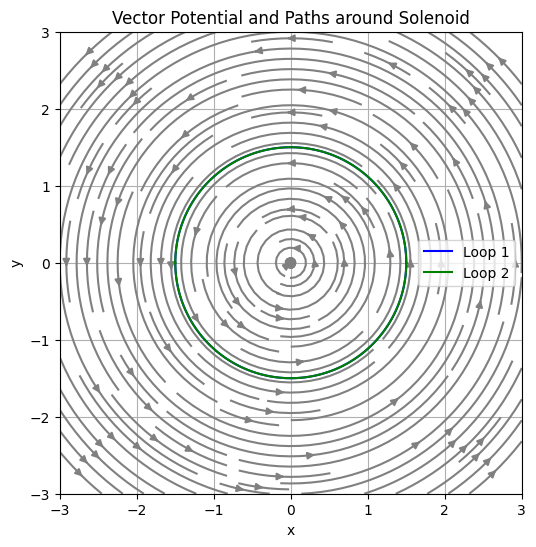

In [13]:
# Plotting the paths and vector potential
plt.figure(figsize=(10, 6))
x_range = np.linspace(-d, d, 400)
y_range = np.linspace(-d, d, 400)
X, Y = np.meshgrid(x_range, y_range)
Ax, Ay = vector_potential(X, Y, R, B)
plt.streamplot(X, Y, Ax, Ay, density=1.5, color='gray')

x1, y1 = loop1
x2, y2 = loop2
plt.plot(x1, y1, label='Loop 1', color='blue')
plt.plot(x2, y2, label='Loop 2', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Potential and Paths around Solenoid')
plt.legend()
plt.grid()
plt.xlim([-d, d])
plt.ylim([-d, d])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Cell 6: Analysis and Results

In [14]:
print(f"Total Phase Difference in X-θ Framework: {delta_phi_total}")
print(f"Phase Difference in Traditional QM: {delta_phi_qm_value}")


Total Phase Difference in X-θ Framework: 2.9790220576633977e+34
Phase Difference in Traditional QM: 0.0


# Simulation of the Aharonov-Bohm Effect in Traditional QM and X-θ Framework

This notebook simulates the Aharonov-Bohm effect in both traditional Quantum Mechanics (QM) and an extended X-θ framework. The AB effect demonstrates that quantum particles can be influenced by electromagnetic potentials even in regions where the corresponding fields are zero. The X-θ framework extends this by introducing an internal phase θ, which can also influence quantum interference patterns.

### Magnetic Field Configuration
- **B Field**: Confined within a solenoid, zero outside.
- **Vector Potential (A)**: Non-zero outside the solenoid, leading to quantum interference even when B=0.

### Explanation in Traditional QM
In traditional QM, the Aharonov-Bohm effect is explained by the influence of the vector potential A on the phase of quantum particles, even when the magnetic field B is zero outside the solenoid:

\[
\Delta \phi = \frac{e}{\hbar} \oint \mathbf{A} \cdot d\mathbf{l}
\]

### X-θ Framework Extension
In the X-θ framework, we introduce an internal phase θ, which extends the configuration space of a particle. This internal phase contributes to the vector potential, allowing for additional modulation of quantum interference patterns:

\[
A_{\theta} = 0.5 \times \sin(\theta)
\]

### Results and Analysis
The plots and calculations show the phase difference as a function of θ in the X-θ framework compared to the constant phase shift in traditional QM. This visualizes how internal phases can modulate quantum interference and potentially provides new mechanisms for controlling quantum states.
